<a href="https://colab.research.google.com/github/AHFIDAILabs/SmartClimateForecast/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install datasets

In [ ]:
# reading in the dataset

from datasets import load_dataset
df = load_dataset("AHFIDAILabs/CS4RRA")


African%20Climate%20Data.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/22680 [00:00<?, ? examples/s]

In [ ]:
# reading in the dataset
df = pd.read_csv("hf://datasets/AHFIDAILabs/CS4RRA/African Climate Data.csv")

In [ ]:
# checks for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# checks for outliers
df.describe()

,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,22680.000000,22680.000000,2.268000e+04,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,...,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000
mean,3.727105,15.206267,1.738191e+09,26.217813,79.193563,8.158448,13.132059,171.226543,1015.171384,29.976848,...,17.309065,423.916263,64.984449,5.679555,6.210245,28.287352,69.726344,1.911508,3.100176,50.511905
std,16.052827,18.677680,1.288729e+07,4.986073,8.974740,13.080761,21.050977,99.089202,5.117556,0.151661,...,21.926646,249.430568,25.478212,11.240894,19.497431,29.335963,122.912645,0.950408,2.607251,35.062383
min,-29.320000,-17.440000,1.715849e+09,3.400000,38.200000,2.200000,3.600000,1.000000,998.000000,29.480000,...,3.600000,86.850000,0.600000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,-4.260000,-0.216700,1.727085e+09,23.300000,73.900000,4.500000,7.200000,80.000000,1012.000000,29.880000,...,10.400000,279.350000,49.000000,1.110000,0.740000,9.990000,14.800000,1.000000,1.000000,15.000000
50%,6.310600,15.284700,1.738232e+09,26.300000,79.300000,7.200000,11.500000,180.000000,1014.000000,29.940000,...,15.000000,360.750000,63.000000,2.405000,1.665000,19.795000,29.970000,2.000000,2.000000,51.000000
75%,12.370300,31.133300,1.749372e+09,29.200000,84.600000,10.700000,17.300000,248.000000,1017.000000,30.030000,...,22.400000,500.700000,79.000000,5.180000,3.700000,35.890000,69.560000,2.000000,3.000000,85.000000
max,36.802800,45.370000,1.760343e+09,47.100000,116.800000,1841.200000,2963.200000,360.000000,1040.000000,30.710000,...,2970.400000,4802.600000,412.000000,135.050000,521.330000,388.500000,2005.580000,6.000000,10.000000,100.000000


## Meteorological Variables

In [ ]:
# grouping the meteorological variables

meteo_features = [
    "temperature_celsius", "temperature_fahrenheit",
    "feels_like_celsius", "feels_like_fahrenheit",
    "humidity", "pressure_mb", "pressure_in",
    "cloud", "visibility_km", "visibility_miles", "uv_index"
]

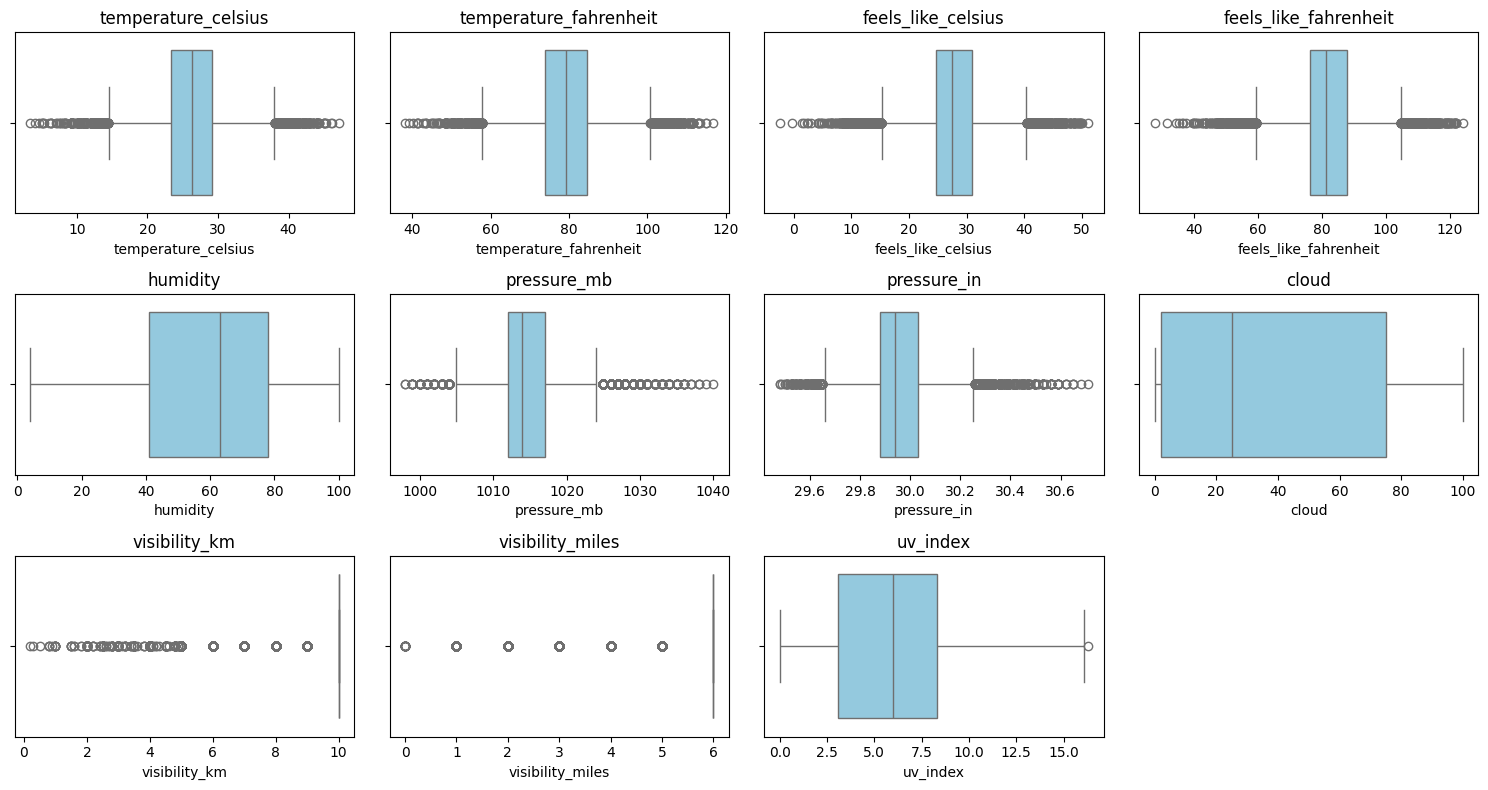

In [ ]:
# checking the outlier using box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(meteo_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# conducting normality checks on the meteorological variables (to know how best to handle the outliers)
# initializing the results list

results = []


# Looping through each feature
for col in meteo_features:
    data = df[col].dropna()

    # Skip if feature has too few values
    if len(data) < 8:
        results.append({
            "Feature": col,
            "N": len(data),
            "Shapiro_p": np.nan,
            "DAgostino_p": np.nan,
            "Skewness": np.nan,
            "Kurtosis": np.nan,
            "Normality": "Insufficient Data",
            "Recommended_Method": "N/A"
        })
        continue

    # Normality Tests (Shapiro–Wilk and D’Agostino–Pearson)
    shapiro_p = stats.shapiro(data)[1]
    dagostino_p = stats.normaltest(data)[1]

    # Measure of Shape (Skewness & Kurtosis)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)

    # Decision Rules
    # If both p-values > 0.05 → normal
    if shapiro_p > 0.05 and dagostino_p > 0.05 and abs(skew) < 1 and abs(kurt) < 3:
        normality = "Approximately Normal"
        method = "Z-score"
    else:
        normality = "Non-Normal / Skewed"
        method = "IQR"

    results.append({
        "Feature": col,
        "N": len(data),
        "Shapiro_p": round(shapiro_p, 4),
        "DAgostino_p": round(dagostino_p, 4),
        "Skewness": round(skew, 2),
        "Kurtosis": round(kurt, 2),
        "Normality": normality,
        "Recommended_Method": method
    })


# Converting to DataFrame
normality_summary = pd.DataFrame(results)


# Sorting for readability
normality_summary = normality_summary.sort_values(by="Feature").reset_index(drop=True)


# Displaying final summary
normality_summary

,Feature,N,Shapiro_p,DAgostino_p,Skewness,Kurtosis,Normality,Recommended_Method
0,cloud,22680,0.0,0.0,0.29,-1.35,Non-Normal / Skewed,IQR
1,feels_like_celsius,22680,0.0,0.0,-0.05,0.85,Non-Normal / Skewed,IQR
2,feels_like_fahrenheit,22680,0.0,0.0,-0.05,0.86,Non-Normal / Skewed,IQR
3,humidity,22680,0.0,0.0,-0.37,-0.81,Non-Normal / Skewed,IQR
4,pressure_in,22680,0.0,0.0,0.95,1.19,Non-Normal / Skewed,IQR
5,pressure_mb,22680,0.0,0.0,0.92,1.19,Non-Normal / Skewed,IQR
6,temperature_celsius,22680,0.0,0.0,-0.08,0.95,Non-Normal / Skewed,IQR
7,temperature_fahrenheit,22680,0.0,0.0,-0.08,0.94,Non-Normal / Skewed,IQR
8,uv_index,22680,0.0,0.0,0.24,-0.54,Non-Normal / Skewed,IQR
9,visibility_km,22680,0.0,0.0,-2.46,5.66,Non-Normal / Skewed,IQR


In [ ]:
# checking the outliers using IQR method
outlier_summary = {}

for col in meteo_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df)) * 100
outlier_df.sort_values(by='Outlier_%', ascending=False)


,Outlier_Count,Outlier_%
visibility_miles,5266,23.218695
visibility_km,5266,23.218695
pressure_mb,1764,7.777778
pressure_in,1743,7.685185
feels_like_fahrenheit,937,4.131393
feels_like_celsius,916,4.038801
temperature_celsius,741,3.267196
temperature_fahrenheit,707,3.117284
uv_index,1,0.004409
humidity,0,0.000000


In [ ]:
# checking the outlier using zscore_summary (for normal distribution)
from scipy import stats

zscore_summary = {}

for col in meteo_features:
    z_scores = np.abs(stats.zscore(df[col].dropna()))
    outliers = (z_scores > 3)
    zscore_summary[col] = outliers.sum()

zscore_df = pd.DataFrame.from_dict(zscore_summary, orient='index', columns=['Zscore_Outliers'])
zscore_df['Zscore_%'] = (zscore_df['Zscore_Outliers'] / len(df)) * 100
zscore_df.sort_values(by='Zscore_%', ascending=False)

,Zscore_Outliers,Zscore_%
visibility_miles,621,2.738095
visibility_km,603,2.658730
pressure_in,198,0.873016
pressure_mb,198,0.873016
temperature_celsius,187,0.824515
temperature_fahrenheit,185,0.815697
feels_like_celsius,160,0.705467
feels_like_fahrenheit,160,0.705467
humidity,0,0.000000
cloud,0,0.000000


## Treating the outliers through winzorization

In [ ]:
# Creating a copy of your original dataset
df_capped = df.copy()

In [ ]:
# Winsorize outliers using IQR method
def winsorize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

In [ ]:
# Applying the capping (Winsorization) on the copy
for col in meteo_features:
    lower = df_capped[col].quantile(0.01)
    upper = df_capped[col].quantile(0.99)
    df_capped[col] = np.clip(df_capped[col], lower, upper)

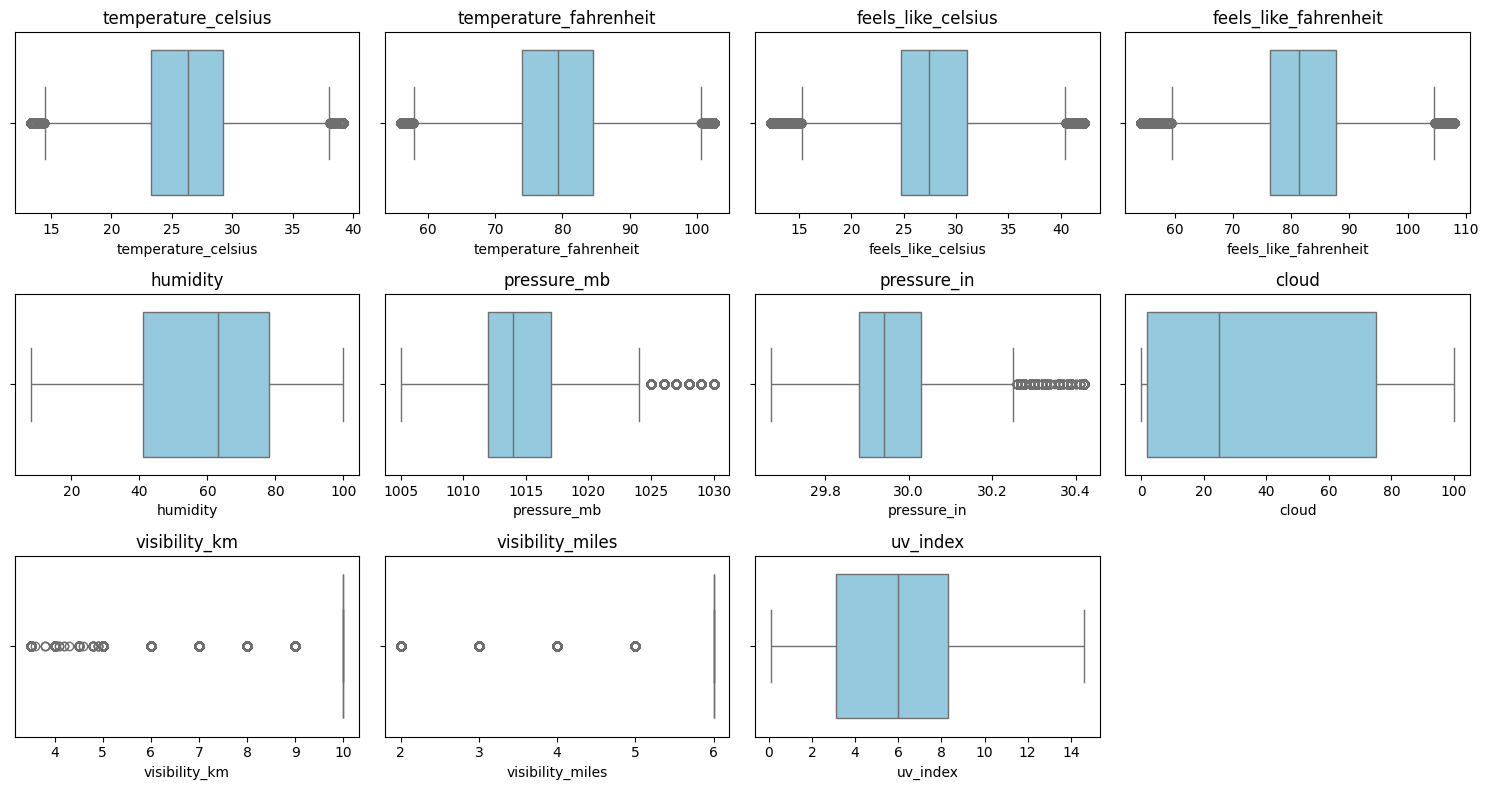

In [ ]:
# checking the outlier of the capped features using box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(meteo_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_capped[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
outlier_summary = {}
for col in meteo_features:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    # Identify outliers below lower bound or above upper bound
    outliers = df_capped[(df_capped[col] < lower) | (df_capped[col] > upper)][col]

    # Store the number of outliers for each feature
    outlier_summary[col] = len(outliers)

# Convert results into a DataFrame for easy interpretation
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df_capped)) * 100

# Sort by percentage of outliers descending
outlier_df = outlier_df.sort_values(by='Outlier_%', ascending=False)

# Display results
outlier_df

,Outlier_Count,Outlier_%
visibility_miles,5266,23.218695
visibility_km,5266,23.218695
pressure_in,1557,6.865079
pressure_mb,1557,6.865079
feels_like_fahrenheit,937,4.131393
feels_like_celsius,916,4.038801
temperature_celsius,741,3.267196
temperature_fahrenheit,707,3.117284
humidity,0,0.000000
cloud,0,0.000000


In [ ]:
def detect_outliers_iqr(df, features):
    summary = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)][col]
        summary[col] = len(outliers)
    outlier_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Outlier_Count'])
    outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df)) * 100
    return outlier_df

# Before capping
outlier_before = detect_outliers_iqr(df, meteo_features)
# After capping
outlier_after = detect_outliers_iqr(df_capped, meteo_features)

# Combine results
outlier_compare = outlier_before.join(outlier_after, lsuffix='_Before', rsuffix='_After')
outlier_compare['ΔOutlier_%'] = outlier_compare['Outlier_%_Before'] - outlier_compare['Outlier_%_After']
outlier_compare.sort_values('ΔOutlier_%', ascending=False)

,Outlier_Count_Before,Outlier_%_Before,Outlier_Count_After,Outlier_%_After,ΔOutlier_%
pressure_mb,1764,7.777778,1557,6.865079,0.912698
pressure_in,1743,7.685185,1557,6.865079,0.820106
uv_index,1,0.004409,0,0.000000,0.004409
feels_like_celsius,916,4.038801,916,4.038801,0.000000
temperature_fahrenheit,707,3.117284,707,3.117284,0.000000
temperature_celsius,741,3.267196,741,3.267196,0.000000
humidity,0,0.000000,0,0.000000,0.000000
feels_like_fahrenheit,937,4.131393,937,4.131393,0.000000
cloud,0,0.000000,0,0.000000,0.000000
visibility_km,5266,23.218695,5266,23.218695,0.000000


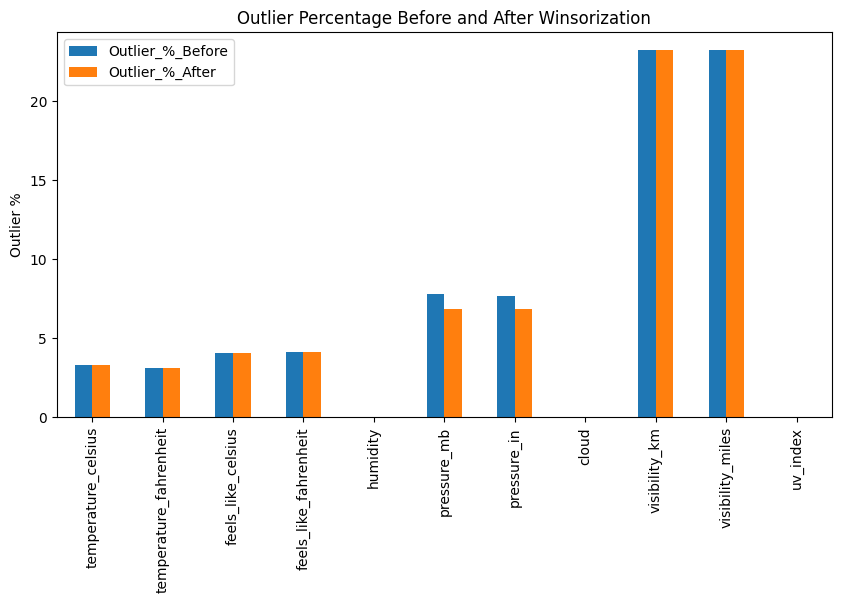

In [ ]:
outlier_compare.plot(
    y=['Outlier_%_Before', 'Outlier_%_After'],
    kind='bar',
    figsize=(10,5),
    title='Outlier Percentage Before and After Winsorization'
)
plt.ylabel('Outlier %')
plt.show()

In [ ]:
# Apply log1p transformation directly on visi
df_capped['visibility_km_log'] = np.log1p(df_capped['visibility_km'])
df_capped['visibility_miles_log'] = np.log1p(df_capped['visibility_miles'])

## Precipitation Features

In [ ]:
# grouping the precipitation variables

precip_features = ['precip_mm', 'precip_in']


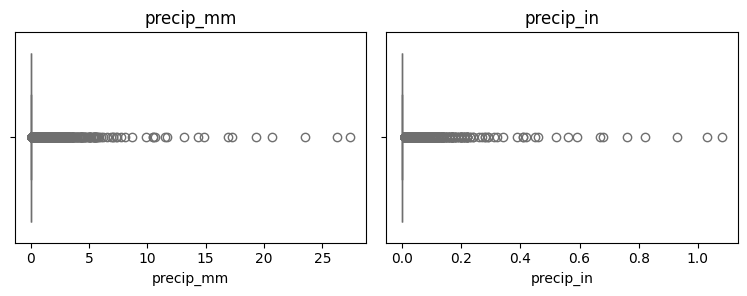

In [ ]:
# checking the outlier using box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(precip_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_capped[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
# conducting normality checks on the precipitation variables (to know how best to handle the outliers)
# initializing the results list

results = []


# Looping through each feature
for col in precip_features:
    data = df_capped[col].dropna()

    # Skip if feature has too few values
    if len(data) < 8:
        results.append({
            "Feature": col,
            "N": len(data),
            "Shapiro_p": np.nan,
            "DAgostino_p": np.nan,
            "Skewness": np.nan,
            "Kurtosis": np.nan,
            "Normality": "Insufficient Data",
            "Recommended_Method": "N/A"
        })
        continue

    # Normality Tests (Shapiro–Wilk and D’Agostino–Pearson)
    shapiro_p = stats.shapiro(data)[1]
    dagostino_p = stats.normaltest(data)[1]

    # Measure of Shape (Skewness & Kurtosis)
    skew = stats.skew(data)
    kurt = stats.kurtosis(data)

    # Decision Rules
    # If both p-values > 0.05 → normal
    if shapiro_p > 0.05 and dagostino_p > 0.05 and abs(skew) < 1 and abs(kurt) < 3:
        normality = "Approximately Normal"
        method = "Z-score"
    else:
        normality = "Non-Normal / Skewed"
        method = "IQR"

    results.append({
        "Feature": col,
        "N": len(data),
        "Shapiro_p": round(shapiro_p, 4),
        "DAgostino_p": round(dagostino_p, 4),
        "Skewness": round(skew, 2),
        "Kurtosis": round(kurt, 2),
        "Normality": normality,
        "Recommended_Method": method
    })


# Converting to DataFrame
normality_summary = pd.DataFrame(results)


# Sorting for readability
normality_summary = normality_summary.sort_values(by="Feature").reset_index(drop=True)


# Displaying final summary
normality_summary

,Feature,N,Shapiro_p,DAgostino_p,Skewness,Kurtosis,Normality,Recommended_Method
0,precip_in,22680,0.0,0.0,18.92,587.47,Non-Normal / Skewed,IQR
1,precip_mm,22680,0.0,0.0,19.02,592.95,Non-Normal / Skewed,IQR


In [ ]:
# checking the outliers using IQR method
outlier_summary = {}

for col in precip_features:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_capped[(df_capped[col] < lower) | (df_capped[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df_capped)) * 100
outlier_df.sort_values(by='Outlier_%', ascending=False)

,Outlier_Count,Outlier_%
precip_mm,4269,18.822751
precip_in,3314,14.611993


# Treating the outliers through winzorization

In [ ]:
# Winsorize outliers using IQR method
def winsorize_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

In [ ]:
# Applying the capping (Winsorization) on the dataset
for col in precip_features:
    lower = df_capped[col].quantile(0.01)
    upper = df_capped[col].quantile(0.99)
    df_capped[col] = np.clip(df_capped[col], lower, upper)

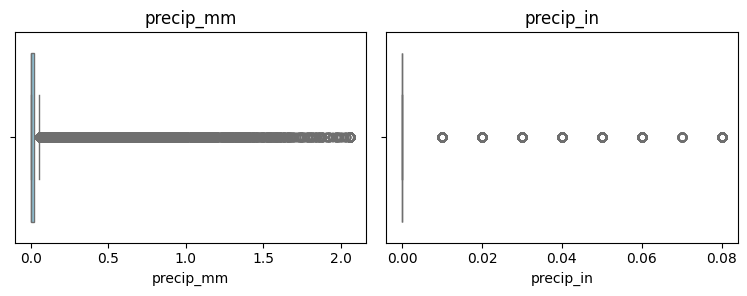

In [ ]:
# checking the outlier of the capped features using box plots
plt.figure(figsize=(15, 8))
for i, col in enumerate(precip_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_capped[col], color='skyblue')
    plt.title(col)
plt.tight_layout()
plt.show()

In [ ]:
def detect_outliers_iqr(df, features):
    summary = {}
    for col in features:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df_capped[(df_capped[col] < lower) | (df_capped[col] > upper)][col]
        summary[col] = len(outliers)
    outlier_df = pd.DataFrame.from_dict(summary, orient='index', columns=['Outlier_Count'])
    outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df_capped)) * 100
    return outlier_df

# Before capping
outlier_before = detect_outliers_iqr(df, precip_features)
# After capping
outlier_after = detect_outliers_iqr(df_capped, precip_features)

# Combine results
outlier_compare = outlier_before.join(outlier_after, lsuffix='_Before', rsuffix='_After')
outlier_compare['ΔOutlier_%'] = outlier_compare['Outlier_%_Before'] - outlier_compare['Outlier_%_After']
outlier_compare.sort_values('ΔOutlier_%', ascending=False)

,Outlier_Count_Before,Outlier_%_Before,Outlier_Count_After,Outlier_%_After,ΔOutlier_%
precip_mm,4269,18.822751,4269,18.822751,0.0
precip_in,3314,14.611993,3314,14.611993,0.0


# Dropping off unnecessary column

In [ ]:
# Define columns to drop
cols_to_drop = [
    'timezone',
    'last_updated_epoch',
    'temperature_fahrenheit',
    'feels_like_fahrenheit',
    'wind_mph',
    'pressure_in',
    'gust_mph',
    'precip_in',
    'visibility_miles',
    'air_quality_us-epa-index',
    'air_quality_gb-defra-index',
    'moon_illumination'
]


In [ ]:
# Drop safely (ignore errors if some columns are missing)
df_capped.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Confirm changes
df_capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22680 entries, 0 to 22679
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       22680 non-null  object 
 1   location_name                 22680 non-null  object 
 2   latitude                      22680 non-null  float64
 3   longitude                     22680 non-null  float64
 4   last_updated                  22680 non-null  object 
 5   temperature_celsius           22680 non-null  float64
 6   condition_text                22680 non-null  object 
 7   wind_kph                      22680 non-null  float64
 8   wind_degree                   22680 non-null  int64  
 9   wind_direction                22680 non-null  object 
 10  pressure_mb                   22680 non-null  int64  
 11  precip_mm                     22680 non-null  float64
 12  humidity                      22680 non-null  int64  
 13  c

# Standardizing the date

In [ ]:
# Convert to datetime safely
df_capped["datetime"] = pd.to_datetime(df_capped["last_updated"], errors="coerce")

In [ ]:
# Extract year
df_capped["year"] = df_capped["datetime"].dt.year
# extract month
df_capped["month"] = df_capped["datetime"].dt.month
# extract day
df_capped["day"] = df_capped["datetime"].dt.day
# extract hour
df_capped["hour"] = df_capped["datetime"].dt.hour

In [ ]:
df_capped["year"].value_counts()

,count
year,
2025,12633
2024,10047


<Axes: xlabel='year'>

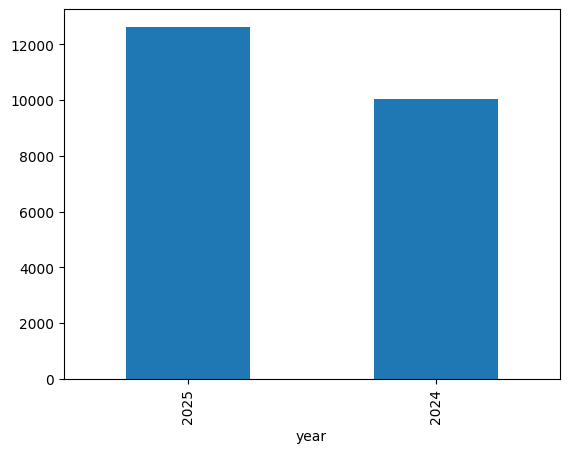

In [ ]:
# bar chart on year
df_capped["year"].value_counts().plot(kind="bar")

In [ ]:
df_capped["month"].value_counts()

,count
month,
8,2739
9,2669
6,2631
7,2620
5,2111
10,1949
12,1364
1,1363
3,1363


In [ ]:
# check by month name
df_capped["month_name"] = df_capped["datetime"].dt.month_name()

In [ ]:
# value counts by month name
df_capped["month_name"].value_counts()

,count
month_name,
August,2739
September,2669
June,2631
July,2620
May,2111
October,1949
December,1364
January,1363
March,1363


In [ ]:
# arrange the month in the right order first
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

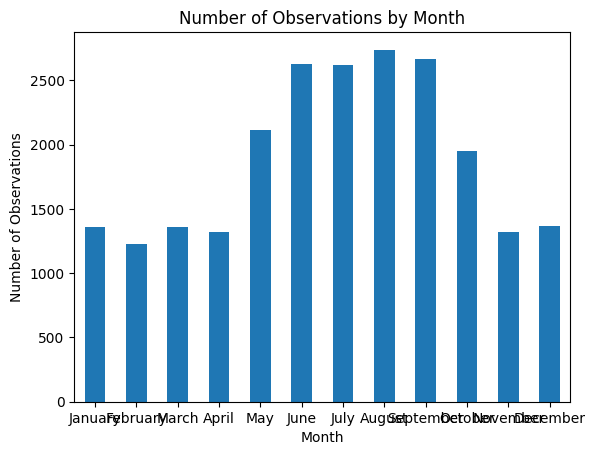

In [ ]:
# plot the bar chart to reflect month order
df_capped["month_name"].value_counts().reindex(month_order).plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Number of Observations by Month")
plt.xlabel("Month")
plt.ylabel("Number of Observations")
plt.show()

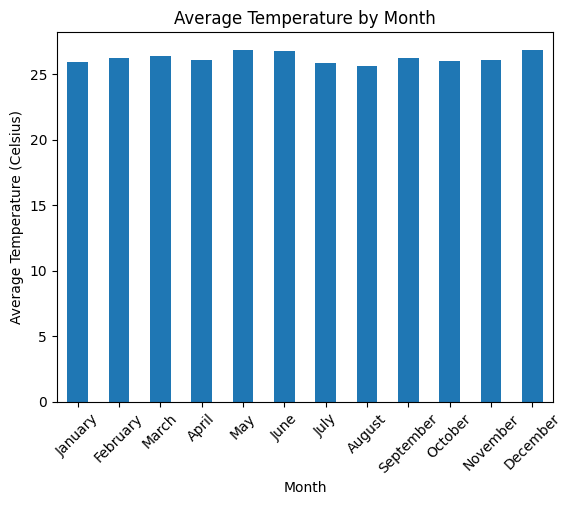

In [ ]:
# bar chart for average temperature by month
df_capped.groupby("month_name")["temperature_celsius"].mean().reindex(month_order).plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Average Temperature (Celsius)")
plt.show()

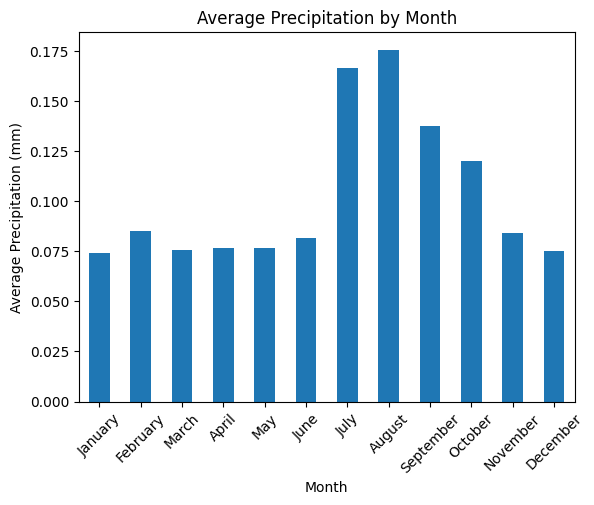

In [ ]:
# average precipitation by month
df_capped.groupby("month_name")["precip_mm"].mean().reindex(month_order).plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Average Precipitation by Month")
plt.xlabel("Month")
plt.ylabel("Average Precipitation (mm)")
plt.show()

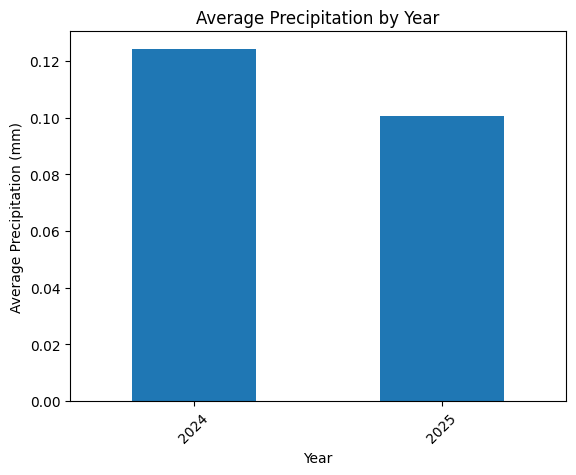

In [ ]:
# average precipitaiton by year
df_capped.groupby("year")["precip_mm"].mean().plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Average Precipitation by Year")
plt.xlabel("Year")
plt.ylabel("Average Precipitation (mm)")
plt.show()

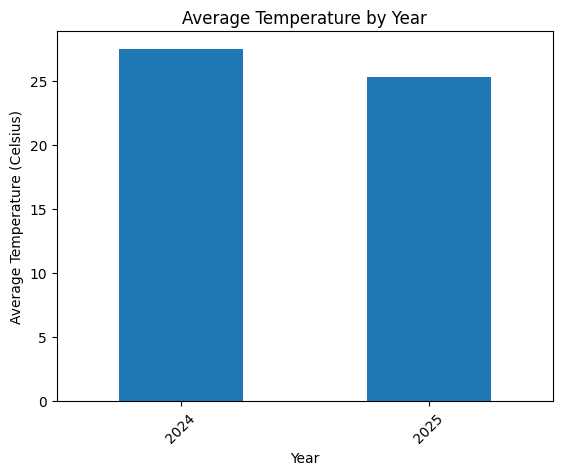

In [ ]:
# average temperature by year
df_capped.groupby("year")["temperature_celsius"].mean().plot(kind="bar")
plt.xticks(rotation=45)
plt.title("Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Average Temperature (Celsius)")
plt.show()

In [ ]:
# correlation between temperature and precipitation
df_capped[["temperature_celsius", "precip_mm"]].corr()

,temperature_celsius,precip_mm
temperature_celsius,1.000000,-0.108658
precip_mm,-0.108658,1.000000


# Redifining the Conditional Column

In [ ]:
# Redefine the condition groups
condition_groups = {
    'Clear/Sunny': ['Sunny', 'Clear'],
    'Cloudy/Partly Cloudy': ['Partly cloudy', 'Partly Cloudy', 'Overcast', 'Cloudy'],
    'Rain/Drizzle/Showers': [
        'Light rain', 'Light rain shower', 'Patchy rain nearby', 'Patchy light rain',
        'Light drizzle', 'Patchy light drizzle', 'Moderate rain', 'Moderate rain at times',
        'Heavy rain', 'Heavy rain at times', 'Moderate or heavy rain shower', 'Patchy rain possible'
    ],
    'Thunderstorms': [
        'Patchy light rain with thunder', 'Patchy light rain in area with thunder',
        'Moderate or heavy rain with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'
    ],
    'Fog/Mist': ['Fog', 'Mist']
}

# Create reverse mapping
category_map = {label: category for category, labels in condition_groups.items() for label in labels}

# Apply the mapping
df_capped['condition_category'] = df_capped['condition_text'].map(category_map)

In [ ]:
# checks for missing values
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
df_capped['condition_text'].value_counts()

,count
condition_text,
Sunny,8893
Partly cloudy,7607
Patchy rain nearby,1844
Partly Cloudy,1176
Mist,675
Light rain shower,498
Overcast,458
Light rain,343
Moderate or heavy rain with thunder,266


In [ ]:
df_capped['condition_category'].value_counts()

,count
condition_category,
Cloudy/Partly Cloudy,9410
Clear/Sunny,8926
Rain/Drizzle/Showers,3063
Fog/Mist,681
Thunderstorms,600


Text(0.5, 1.0, 'Distribution of Weather Condition Categories')

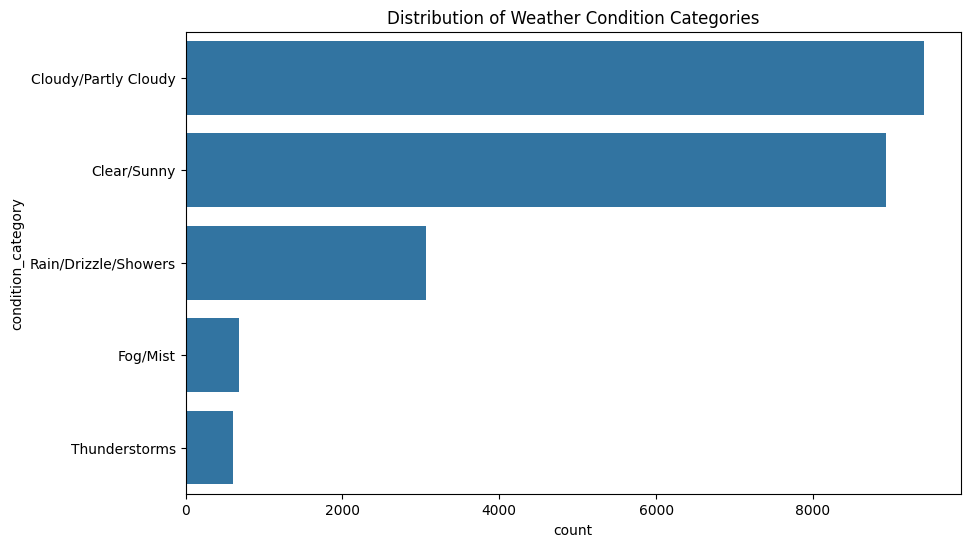

In [ ]:
# plot bar chat for the condition category value counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df_capped, y='condition_category', order=df['condition_category'].value_counts().index)
plt.title('Distribution of Weather Condition Categories')

In [ ]:
# Compute IQR thresholds before capping
bounds = {}
for col in meteo_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)

# Apply same old thresholds on the capped data
outlier_summary = {}
for col, (lower, upper) in bounds.items():
    outliers = df_capped[(df_capped[col] < lower) | (df_capped[col] > upper)][col]
    outlier_summary[col] = len(outliers)

outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier_Count'])
outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df_capped)) * 100
outlier_df.sort_values(by='Outlier_%', ascending=False)


,Outlier_Count,Outlier_%
visibility_miles,5266,23.218695
visibility_km,5266,23.218695
pressure_in,1557,6.865079
pressure_mb,1557,6.865079
feels_like_fahrenheit,937,4.131393
feels_like_celsius,916,4.038801
temperature_celsius,741,3.267196
temperature_fahrenheit,707,3.117284
humidity,0,0.000000
cloud,0,0.000000


In [ ]:
# box plots for core meteorological variables

In [ ]:
df['condition_text'].unique()

array(['Sunny', 'Partly cloudy', 'Moderate or heavy rain with thunder',
       'Patchy rain nearby', 'Partly Cloudy', 'Overcast',
       'Patchy light rain with thunder', 'Moderate rain at times',
       'Clear', 'Mist', 'Light rain', 'Light rain shower',
       'Thundery outbreaks in nearby', 'Moderate rain', 'Cloudy',
       'Patchy light rain', 'Patchy light rain in area with thunder',
       'Light drizzle', 'Patchy light drizzle', 'Heavy rain',
       'Moderate or heavy rain shower', 'Thundery outbreaks possible',
       'Fog', 'Heavy rain at times', 'Patchy rain possible'], dtype=object)

In [ ]:
# exploring the head of the dataset
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,5/16/2024 9:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,5:40 AM,7:50 PM,1:15 PM,2:14 AM,Waxing Gibbous,55
1,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,5/16/2024 9:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,6:12 AM,5:55 PM,1:17 PM,12:38 AM,Waxing Gibbous,55
2,Benin,Porto-Novo,6.48,2.62,Africa/Porto-Novo,1715849100,5/16/2024 9:45,28.0,82.4,Moderate or heavy rain with thunder,...,8.2,15.7,1,1,6:33 AM,6:59 PM,1:48 PM,1:38 AM,Waxing Gibbous,55
3,Botswana,Gaborone,-24.65,25.91,Africa/Gaborone,1715849100,5/16/2024 10:45,22.0,71.6,Sunny,...,16.4,24.8,2,2,6:45 AM,5:40 PM,1:40 PM,12:27 AM,Waxing Gibbous,55
4,Burkina Faso,Ouagadougou,12.37,-1.52,Africa/Ouagadougou,1715849100,5/16/2024 8:45,32.0,89.6,Moderate or heavy rain with thunder,...,5.4,13.9,1,1,5:42 AM,6:24 PM,12:59 PM,1:01 AM,Waxing Gibbous,55


In [ ]:
# check the data types
df.dtypes

,0
country,object
location_name,object
latitude,float64
longitude,float64
timezone,object
last_updated_epoch,int64
last_updated,object
temperature_celsius,float64
temperature_fahrenheit,float64
condition_text,object


In [ ]:
# checking missing data
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
# shape of the dataset
df.shape

(22680, 41)

In [ ]:
# Redefine the condition groups
condition_groups = {
    'Clear/Sunny': ['Sunny', 'Clear'],
    'Cloudy/Partly Cloudy': ['Partly cloudy', 'Partly Cloudy', 'Overcast', 'Cloudy'],
    'Rain/Drizzle/Showers': [
        'Light rain', 'Light rain shower', 'Patchy rain nearby', 'Patchy light rain',
        'Light drizzle', 'Patchy light drizzle', 'Moderate rain', 'Moderate rain at times',
        'Heavy rain', 'Heavy rain at times', 'Moderate or heavy rain shower', 'Patchy rain possible'
    ],
    'Thunderstorms': [
        'Patchy light rain with thunder', 'Patchy light rain in area with thunder',
        'Moderate or heavy rain with thunder', 'Thundery outbreaks in nearby', 'Thundery outbreaks possible'
    ],
    'Fog/Mist': ['Fog', 'Mist']
}

# Create reverse mapping
category_map = {label: category for category, labels in condition_groups.items() for label in labels}

# Apply the mapping
df['condition_category'] = df['condition_text'].map(category_map)

In [ ]:
df.shape

(22680, 42)

In [ ]:
# checks for missing values
df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [ ]:
df['condition_text'].value_counts()

,count
condition_text,
Sunny,8893
Partly cloudy,7607
Patchy rain nearby,1844
Partly Cloudy,1176
Mist,675
Light rain shower,498
Overcast,458
Light rain,343
Moderate or heavy rain with thunder,266


In [ ]:
df['condition_category'].value_counts()

,count
condition_category,
Cloudy/Partly Cloudy,9410
Clear/Sunny,8926
Rain/Drizzle/Showers,3063
Fog/Mist,681
Thunderstorms,600


Text(0.5, 1.0, 'Distribution of Weather Condition Categories')

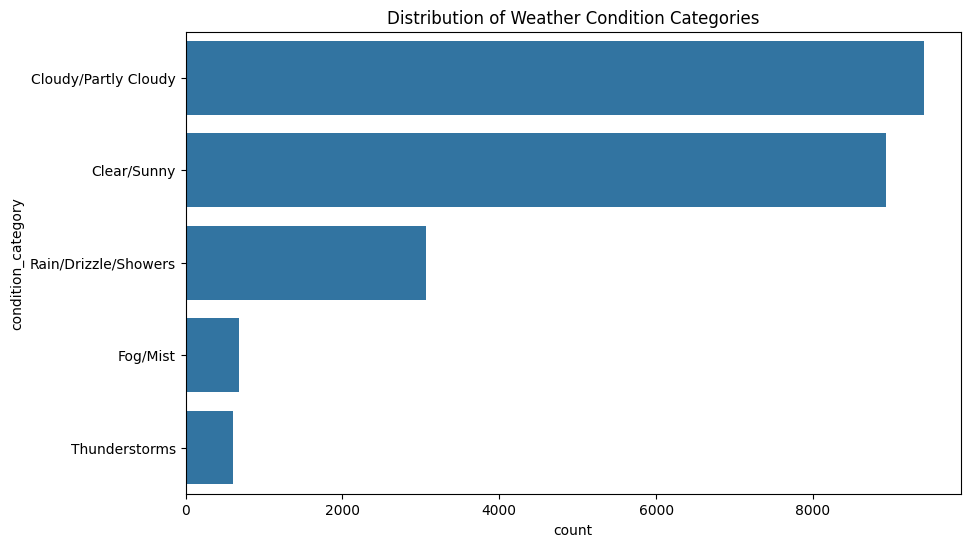

In [ ]:
# plot bar chat for the condition category value counts
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='condition_category', order=df['condition_category'].value_counts().index)
plt.title('Distribution of Weather Condition Categories')

In [ ]:
# save the resulting dataset as csv
df.to_csv('African Climate Data.csv', index=False)

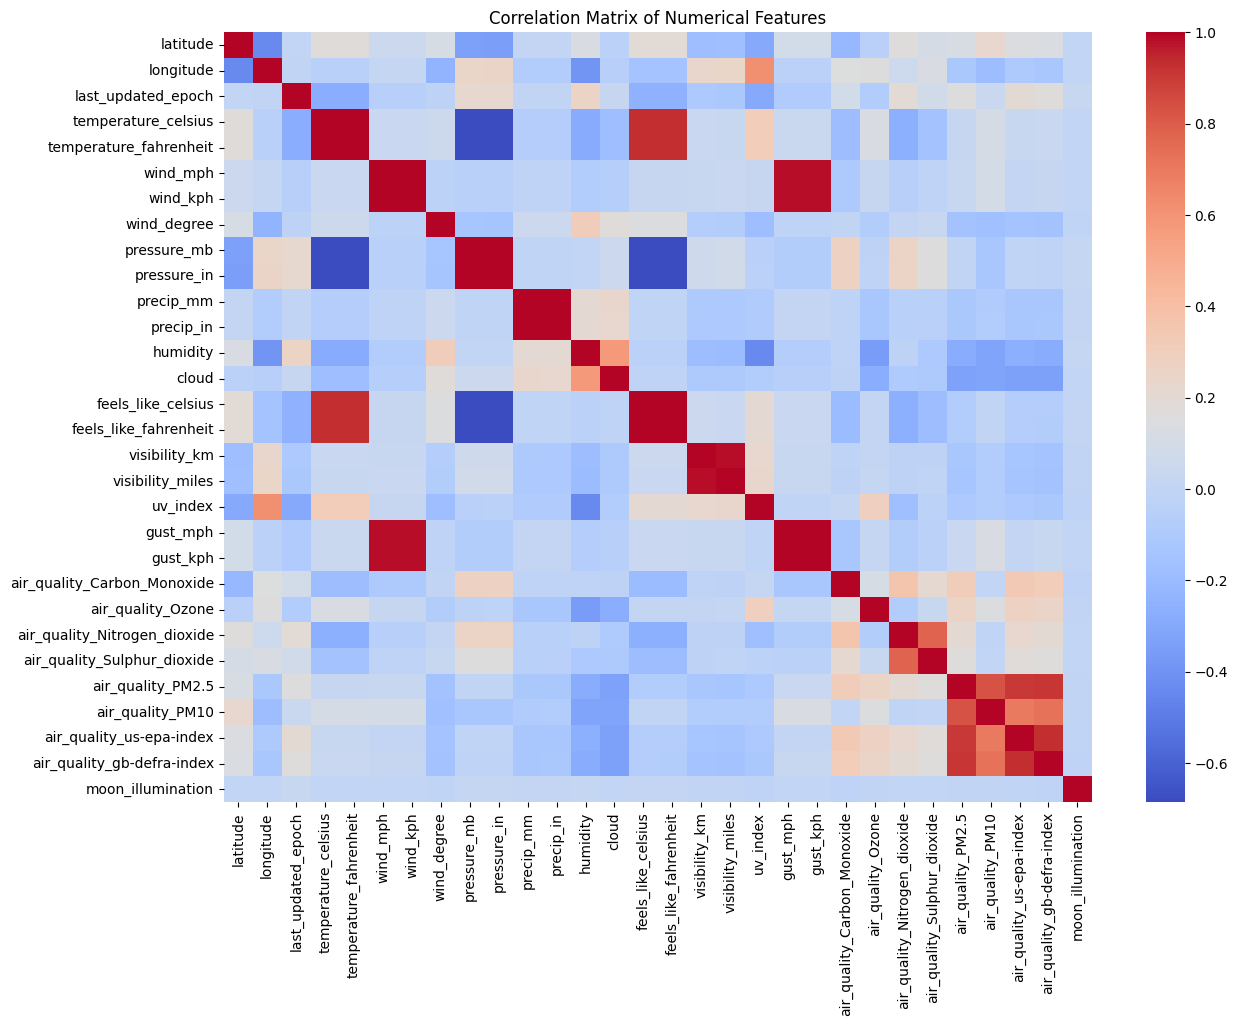

In [ ]:
# Explore correlations between numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

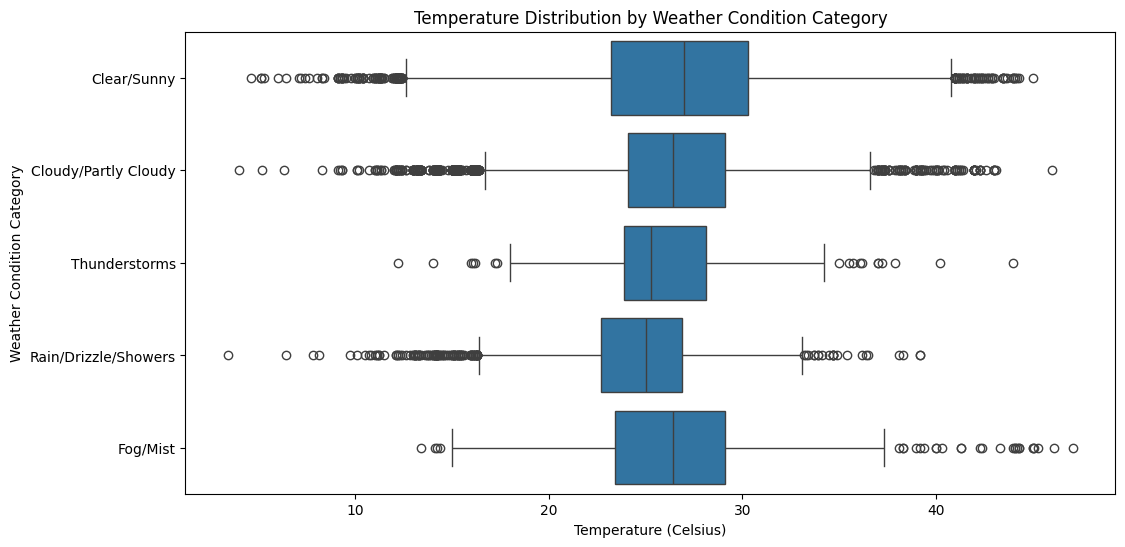

In [ ]:
# Visualize the relationship between temperature and condition category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='temperature_celsius', y='condition_category')
plt.title('Temperature Distribution by Weather Condition Category')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Weather Condition Category')
plt.show()

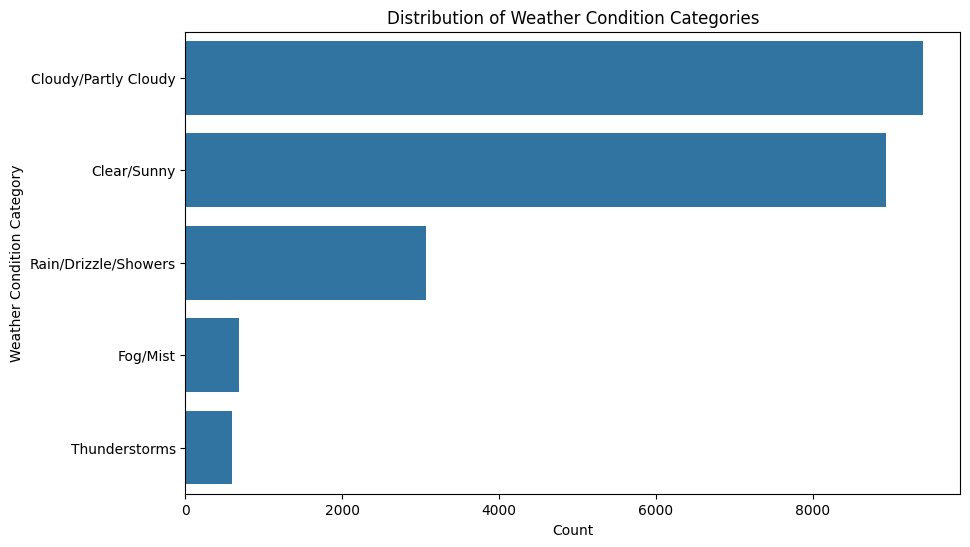

In [ ]:
# Visualize the distribution of 'condition_category'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='condition_category', order = df['condition_category'].value_counts().index)
plt.title('Distribution of Weather Condition Categories')
plt.xlabel('Count')
plt.ylabel('Weather Condition Category')
plt.show()

In [ ]:
# Analyze numerical features
numerical_cols = df.select_dtypes(include=np.number).columns

print("\nAnalysis of numerical features:")
display(df[numerical_cols].describe())


Analysis of numerical features:


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,...,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,22680.000000,22680.000000,2.268000e+04,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,...,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000,22680.000000
mean,3.727105,15.206267,1.738191e+09,26.217813,79.193563,8.158448,13.132059,171.226543,1015.171384,29.976848,...,17.309065,423.916263,64.984449,5.679555,6.210245,28.287352,69.726344,1.911508,3.100176,50.511905
std,16.052827,18.677680,1.288729e+07,4.986073,8.974740,13.080761,21.050977,99.089202,5.117556,0.151661,...,21.926646,249.430568,25.478212,11.240894,19.497431,29.335963,122.912645,0.950408,2.607251,35.062383
min,-29.320000,-17.440000,1.715849e+09,3.400000,38.200000,2.200000,3.600000,1.000000,998.000000,29.480000,...,3.600000,86.850000,0.600000,0.000000,0.000000,0.500000,0.500000,1.000000,1.000000,0.000000
25%,-4.260000,-0.216700,1.727085e+09,23.300000,73.900000,4.500000,7.200000,80.000000,1012.000000,29.880000,...,10.400000,279.350000,49.000000,1.110000,0.740000,9.990000,14.800000,1.000000,1.000000,15.000000
50%,6.310600,15.284700,1.738232e+09,26.300000,79.300000,7.200000,11.500000,180.000000,1014.000000,29.940000,...,15.000000,360.750000,63.000000,2.405000,1.665000,19.795000,29.970000,2.000000,2.000000,51.000000
75%,12.370300,31.133300,1.749372e+09,29.200000,84.600000,10.700000,17.300000,248.000000,1017.000000,30.030000,...,22.400000,500.700000,79.000000,5.180000,3.700000,35.890000,69.560000,2.000000,3.000000,85.000000
max,36.802800,45.370000,1.760343e+09,47.100000,116.800000,1841.200000,2963.200000,360.000000,1040.000000,30.710000,...,2970.400000,4802.600000,412.000000,135.050000,521.330000,388.500000,2005.580000,6.000000,10.000000,100.000000


In [ ]:
# Analyze categorical features
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\nAnalysis of column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Value counts:\n{df[col].value_counts()}")


Analysis of column: country
Unique values: ['Algeria' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi' 'Cameroon'
 'Central African Republic' 'Chad' 'Congo' 'Democratic Republic of Congo'
 'Djibouti' 'Egypt' 'Equatorial Guinea' 'Eritrea' 'Swaziland' 'Ethiopia'
 'Gabon' 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Kenya' 'Lesotho'
 'Liberia' 'Malawi' 'Mali' 'Mauritania' 'Morocco' 'Mozambique' 'Niger'
 'Nigeria' 'Rwanda' 'Senegal' 'Sierra Leone' 'Somalia' 'South Africa'
 'Sudan' 'Tanzania' 'Tunisia' 'Uganda' 'Zambia' 'Zimbabwe' 'Libya' 'Togo'
 'Marrocos' "Cote d'Ivoire"]
Value counts:
country
Sudan                           1028
Kenya                            516
Angola                           515
Eritrea                          515
Equatorial Guinea                515
Burundi                          515
Botswana                         515
Mali                             515
Malawi                           515
Mozambique                       515
Mauritania                   

In [ ]:
# Explore data types
print("Data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Data types:
country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                       int64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                  int64
uv_index                    